<a href="https://colab.research.google.com/github/rushikeshnaik779/flower_pred/blob/main/%F0%9F%8C%BC_flowerPrediction%F0%9F%8C%BC_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle (1).json to kaggle (1).json
User uploaded file "kaggle (1).json" with length 65 bytes


In [ ]:
!kaggle competitions list

ref                                                  deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                         2030-07-01 23:59:00  Getting Started     Prizes         61            True  
gan-getting-started                                  2030-07-01 23:59:00  Getting Started     Prizes        139           False  
tpu-getting-started                                  2030-06-03 23:59:00  Getting Started  Knowledge        191           False  
digit-recognizer                                     2030-01-01 00:00:00  Getting Started  Knowledge       1572           False  
titanic                                              2030-01-01 00:00:00  Getting Started  Knowledge      49850            True  
house-prices-advanced-regression-techniques          2030-01-01 00:00:00  Getting Started 

In [ ]:
!kaggle datasets download -d alxmamaev/flowers-recognition

 93% 209M/225M [00:09<00:00, 23.4MB/s]
100% 225M/225M [00:09<00:00, 24.2MB/s]


In [ ]:
# let's unzip the ffiles 

import zipfile 
# 
zip_ref = zipfile.ZipFile("flowers-recognition.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [ ]:
import os 

for dirpath, dirnames, filenames in os.walk("./"):
    print(f"There are {len(dirpath)} directories and {len(dirnames)} images in '{len(filenames)}")

There are 2 directories and 4 images in '2
There are 9 directories and 2 images in '6
There are 24 directories and 0 images in '1
There are 14 directories and 1 images in '0
There are 25 directories and 0 images in '6
There are 20 directories and 0 images in '0
There are 9 directories and 5 images in '0
There are 19 directories and 0 images in '733
There are 14 directories and 0 images in '784
There are 15 directories and 0 images in '984
There are 19 directories and 0 images in '1052
There are 15 directories and 0 images in '764
There are 13 directories and 0 images in '6


In [ ]:
train_dir = "./flowers"
import pathlib
import numpy as np 

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['daisy' 'dandelion' 'rose' 'sunflower' 'tulip']


In [ ]:
# let's see the random images 

import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

import random 

def view_random_image(target_dir, target_class):
    # set up the target directory 
    target_folder = target_dir+'/' + target_class

    # get random images path 
    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)

    # read in the image and plot it using matplotlib 
    img = mpimg.imread(target_folder+'/'+random_image[0])

    plt.imshow(img)
    plt.title(target_class, size=22)
    plt.axis(False)

    print(f"Image Shape : {img.shape}")

    return img 

['160456948_38c3817c6a_m.jpg']
Image Shape : (240, 199, 3)


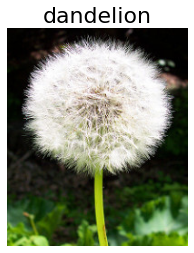

In [ ]:
img = view_random_image(target_dir=train_dir, 
                        target_class = random.choice(class_names))

# Preprocessing the data (Preparing it for the model )

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#rescale 
train_datagen = ImageDataGenerator(rescale=1/255., 
                                   validation_split=0.2)


In [ ]:
train_data = train_datagen.flow_from_directory(
    train_dir, 
    target_size = (224, 224), 
    batch_size = 32, 
    class_mode = "categorical", 
    subset='training'
)
test_data = train_datagen.flow_from_directory(
    train_dir, 
    target_size = (224, 224), 
    batch_size = 32, 
    class_mode = "categorical", 
    subset='validation'
)

Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


In [ ]:
# Let's build a model 

import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

In [ ]:
# set the random seed 

tf.random.set_seed(42)


model_1 = Sequential([
                      Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
                      Conv2D(10, 3, activation="relu"),
                      MaxPool2D(),
                      Conv2D(10, 3, activation="relu"),
                      Conv2D(10, 3, activation="relu"),
                      MaxPool2D(),
                      Flatten(),
                      Dense(len(class_names), activation="softmax")
])

model_1.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [ ]:
history_1 = model_1.fit(
    train_data, 
    epochs=10, 
    steps_per_epoch = len(train_data),
    validation_data = test_data, 
    validation_steps = len(test_data)
)

Epoch 1/10
109/109 [==============================] - 17s 154ms/step - loss: 1.3189 - accuracy: 0.4255 - val_loss: 1.2188 - val_accuracy: 0.5012
Epoch 2/10
109/109 [==============================] - 17s 152ms/step - loss: 1.0778 - accuracy: 0.5713 - val_loss: 1.2582 - val_accuracy: 0.5709
Epoch 3/10
109/109 [==============================] - 17s 152ms/step - loss: 0.9498 - accuracy: 0.6309 - val_loss: 1.0305 - val_accuracy: 0.6035
Epoch 4/10
109/109 [==============================] - 17s 153ms/step - loss: 0.7599 - accuracy: 0.7214 - val_loss: 1.2093 - val_accuracy: 0.5628
Epoch 5/10
109/109 [==============================] - 17s 152ms/step - loss: 0.5524 - accuracy: 0.8024 - val_loss: 1.2435 - val_accuracy: 0.5802
Epoch 6/10
109/109 [==============================] - 17s 152ms/step - loss: 0.3761 - accuracy: 0.8785 - val_loss: 1.3819 - val_accuracy: 0.5686
Epoch 7/10
109/109 [==============================] - 17s 152ms/step - loss: 0.4103 - accuracy: 0.8837 - val_loss: 1.5093 - val_ac

In [ ]:
# Plot the validation and trianing curves separately 

def plot_loss_curves(history):
    """
    returns seprate loss curves

    """
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]


    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"]))

    # plotting loss
    plt.subplots(1, 1, figsize=(12, 7))
    plt.plot(epochs, loss, label="traiing_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()
    plt.show()

    # plotting accuracy 
    plt.subplots(1, 1, figsize=(12, 7))
    plt.plot(epochs, accuracy, label="training accuracy")
    plt.plot(epochs, val_accuracy, label="testing accuracy")
    plt.title("Accuracies")
    plt.xlabel("epochs")
    plt.legend()
    plt.show()

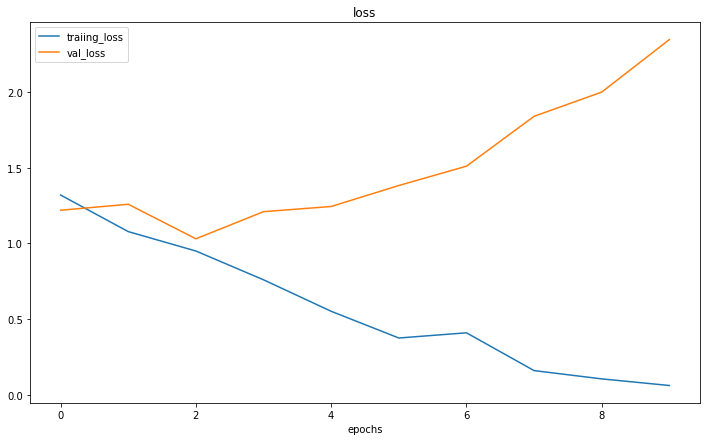

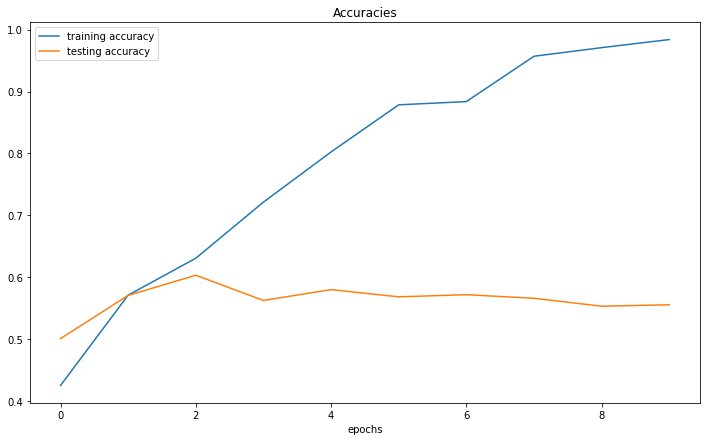

In [ ]:
plot_loss_curves(history_1)

In [ ]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
# Adjust function to work with multi-class
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}", size=22)
  plt.axis(False);

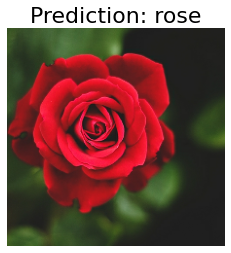

In [ ]:
pred_and_plot(model_1, "./Red-Rose.jpeg", class_names)

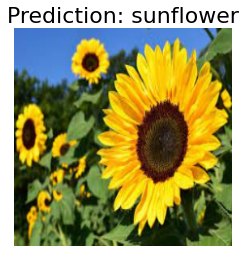

In [ ]:
pred_and_plot(model_1, "./sunflower.jpeg", class_names)

# Let's try to improve the model now! 

## Data Augmentation 


In [ ]:
train_